In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os

In [ ]:
sys.path.append('/content/drive/MyDrive/ESC-10/')
main_path = '/content/drive/MyDrive/ESC-10'

In [ ]:
from IPython.display import Audio
import IPython

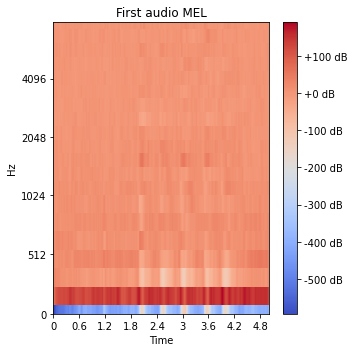

In [ ]:
y1_, sr1_ = librosa.load('/content/drive/MyDrive/ESC-10/001 - Dog bark/1-30226-A.ogg')
plt.figure(figsize=(5, 5))
mel=librosa.feature.mfcc(y=y1_,sr=sr1_)
#mel = librosa.feature.melspectrogram(y=y1_, sr=sr1_)
#print(librosa.power_to_db(mel,ref=np.max))
librosa.display.specshow(mel,y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("First audio MEL")
plt.tight_layout()
plt.savefig('/content/sample_data/mel_spectogram.png')

In [ ]:
subdirs = os.listdir(main_path)
print(subdirs)

# 216 Features per frame, <-|--|--|--|--|--------------------------------> 128 X 216

['002 - Rain', '007 - Helicopter', '005 - Clock tick', '003 - Sea waves', '006 - Person sneeze', '008 - Chainsaw', '004 - Baby cry', '009 - Rooster', '010 - Fire crackling', '001 - Dog bark', '.ipynb_checkpoints', 'audiodata.pkl']


In [ ]:


features =[]
labels= []
for s in subdirs:
  
  try:
    cl_tag = int(str(s).split('-')[0])
    
    files = os.listdir(main_path+'/' + str(s))

    for f in files:
      y1_, sr1_ = librosa.load(main_path +'/'+ str(s)+'/'+str(f))
      mfccs = librosa.feature.mfcc(y=y1_, sr=sr1_, n_mfcc=40)
      mfccs_scaled = np.mean(mfccs.T,axis=0)

      features.append(mfccs_scaled.tolist())
      labels.append(int(cl_tag)-1)

  except Exception as e:
    print(e)

features = np.array(features)
labels = np.array(labels)
print(features.shape)
print(labels.shape)

invalid literal for int() with base 10: '.ipynb_checkpoints'
invalid literal for int() with base 10: 'audiodata.pkl'
(400, 40)
(400,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Dense, Activation,Input
from tensorflow.keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
def my_sequential_model(inp_dim, noc = 10):
  model = Sequential()
  model.add(Dense(input_shape = inp_dim, units= 256, name='dense-1'))
  model.add(Activation('relu'))
  model.add(Dense(units=256))
  model.add(Activation('relu'))
  model.add(Dense(units=noc, activation='softmax'))
  return model

In [ ]:
x,x_test,y,y_test = train_test_split(features,labels,test_size = 0.2)
#print(x_test)
# one-hot representation
y = tf.keras.utils.to_categorical(y)
y_test = tf.keras.utils.to_categorical(y_test)
print(y.shape)


(320, 10)


In [ ]:
my_model = my_sequential_model(x[0].shape)
base_learning_rate = 0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics=['accuracy'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense-1 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 78,858
Trainable params: 78,858
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = my_model.fit(x, y, batch_size = 32, validation_data=(x_test,y_test), verbose=True, epochs=20)

Epoch 1/20
10/10 [==============================] - 1s 31ms/step - loss: 25.7546 - accuracy: 0.0315 - val_loss: 17.5345 - val_accuracy: 0.0250
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 14.2865 - accuracy: 0.0712 - val_loss: 10.4042 - val_accuracy: 0.0375
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 7.9155 - accuracy: 0.1323 - val_loss: 5.7862 - val_accuracy: 0.1750
Epoch 4/20
10/10 [==============================] - 0s 27ms/step - loss: 4.1812 - accuracy: 0.1864 - val_loss: 3.4609 - val_accuracy: 0.2250
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 3.0742 - accuracy: 0.2592 - val_loss: 3.1571 - val_accuracy: 0.3000
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 2.3600 - accuracy: 0.3609 - val_loss: 2.2719 - val_accuracy: 0.4000
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 1.8107 - accuracy: 0.3823 - val_loss: 2.1789 - val_accuracy: 0.4500
Epoch 8/20
10/